In [1]:
import pandas as pd 

df_train = pd.read_csv(r"E:\File Program\Semester II\Jupyter Notebook\Data Latihan\data\New folder (8)\train.csv")
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_train.drop(['Cabin'], axis = 1, inplace = True)

In [5]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train['Embarked'].fillna('S', inplace = True)

In [7]:
embarked = {"Embarked": {"S": 0, "C": 1, "Q": 2}}
df_train.replace(embarked, inplace = True)

In [8]:
df_train.dropna(inplace=True, how='any')

In [9]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_train['Age'] = df_train['Age'].astype(int)

In [10]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [11]:
sex = {'Sex': {'male': 0, 'female': 1}}
df_train.replace(sex, inplace=True)

In [12]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0
6,0,1,0,54,0,0,51,0
7,0,3,0,2,3,1,21,0
8,1,3,1,27,0,2,11,0
9,1,2,1,14,1,0,30,1
10,1,3,1,4,1,1,16,0


In [13]:
import sklearn.model_selection as ms 
features = df_train[['Pclass', 'Embarked', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
label = df_train['Survived']

X_train, X_test, y_train, y_test = ms.train_test_split(features, label, test_size = 0.25, random_state = 0)

In [14]:
import sklearn.naive_bayes as nb
import sklearn.metrics as met 

gnb = nb.GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [15]:
import math

y_prediksi = gnb.predict(X_test)
accuracy = met.accuracy_score(y_test, y_prediksi)
precision = met.precision_score(y_test, y_prediksi)
print('Accuracy =', str(math.ceil(accuracy*100)) + '%')
print('Precision =', str(math.ceil(precision*100)) + '%')

Accuracy = 78%
Precision = 73%


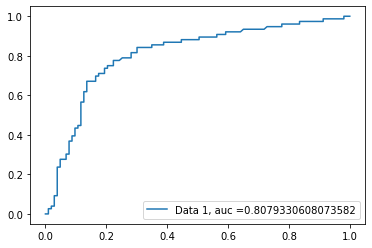

In [16]:
import matplotlib.pyplot as plt

y_pred_proba = gnb.predict_proba(X_test)[::, 1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)

auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp, tp, label = "Data 1, auc =" + str(auc))
plt.legend(loc=4)
plt.show()

In [17]:
import pandas as pd 

df_train = pd.read_csv(r"E:\File Program\Semester II\Jupyter Notebook\Data Latihan\data\New folder (8)\train.csv")
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
sex = {'Sex': {'male': 0, 'female': 1}}
df_train.replace(sex, inplace=True)
df_train['Embarked'].fillna('S', inplace=True)
embarked = {'Embarked': {'S': 0, 'C': 1, 'Q': 2}}
df_train.replace(embarked, inplace=True)
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,NaN,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


In [18]:
pria = df_train['Age'].loc[df_train['Sex'] == 0].mean()
wanita = df_train['Age'].loc[df_train['Sex'] == 1].mean()
print("Pria = ", pria)
print("Wanita = ", wanita)

Pria =  30.72664459161148
Wanita =  27.915708812260537


In [21]:
df_train['Age'].loc[(df_train['Sex'] == 0) & (df_train['Age'].isnull() == True)] = 30.726

In [20]:
df_train['Age'].loc[(df_train['Sex'] == 1) & (df_train['Age'].isnull() == True)] = 27.915

<AxesSubplot:>

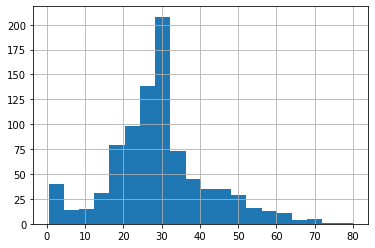

In [22]:
df_train['Age'].hist(bins = 20)

<AxesSubplot:>

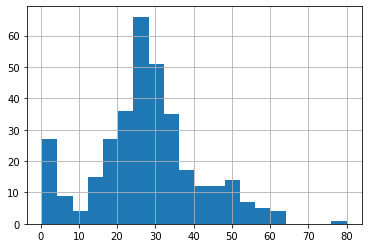

In [23]:
df_train['Age'].loc[df_train['Survived'] == 1].hist(bins = 20)

In [24]:
umur = [0, 5, 15, 25, 30, 35, 45, 50, 200]
umur_label = {'0-5', '5-15', '15-25', '25-30', '25-30', '30-35', '35-45', '45-50', '>50'}
kelompok_umur = pd.cut(df_train['Age'], umur, labels = umur_label)
df_train['KelompokUmur'] = kelompok_umur
df_train['KelompokUmurKode'] = df_train['KelompokUmur'].cat.codes 
df_train['KelompokUmur'].value_counts()

5-15     218
45-50    212
15-25    161
30-35    114
25-30     64
35-45     44
>50       39
0-5       39
Name: KelompokUmur, dtype: int64

<AxesSubplot:>

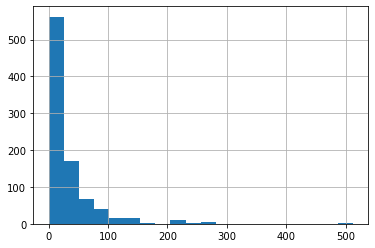

In [25]:
df_train['Fare'].hist(bins=20)

In [26]:
harga = [0, 10, 30, 35, 80, 1000]
harga_label = {'0-10', '10-30', '30-35', '35-80', '>80'}
kelompok_harga = pd.cut(df_train['Fare'], harga, labels = harga_label)
df_train['KelompokHarga'] = kelompok_harga
df_train['KelompokHargaKode'] = df_train['KelompokHarga'].cat.codes

In [27]:
jumlahOrang = df_train['SibSp'].astype(int) + df_train['Parch'].astype(int) + 1
df_train['JumlahOrang'] = jumlahOrang.astype(int)

In [29]:
import sklearn.model_selection as ms 

features - df_train[['Pclass', 'Embarked', 'Sex', 'KelompokUmurKode', 'KelompokHargaKode', 'JumlahOrang']]
label = df_train['Survived']
X_train, X_test, y_train, y_test = ms.train_test_split(features, label, test_size = 0.25, random_state = 0)

ValueError: Found input variables with inconsistent numbers of samples: [714, 891]